The RMS Titanic, a luxury steamship, sank in the early hours of April 15, 1912 off the coast of Newfoundland 
in the North Atlantic after sideswiping an iceberg during its maiden voyage. Of the 2,240 passengers and crew 
on board, more than 1,500 lost their lives in the disaster.

Our goal is to predict which passenger survived and who did not, based on the data provided.

The dataset is already divided in train set and test set.
For more info:
- https://www.kaggle.com/c/titanic


First, we have to frame the problem in order to outline which steps we have to follow in our analysis:
1. Is it supervised, unsupervised, or Reinforcement Learning? Is it a classification task, a regression task, or something else?
2. Select a perfomance measure
3. Data exploring and pattern identification
4. Deal with missing values
5. Experiments with attribute combination 
6. Data cleaning
7. Converting features
8. Select the model

- Most of the time there are more steps to follow - for ex. how to split the given data by reducing bias.

In [1]:
# Imported libraries that we are going to use for the analysis
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import sklearn.linear_model
import seaborn as sns

# Encoders
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Performance measures
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score

In [2]:
# Let's start loading the data
def load_file(File_name):
    """creating a function to load the files"""
    df = pd.read_csv(File_name,thousands=",",delimiter=",",encoding="latin1", na_values="n/a")
    return df

In [3]:
# Loading the data
df_train = load_file("train.csv")
df_test = load_file("test.csv")
data = [df_train,df_test]

From the information provided, we  know:
Survived = 0 means that the passengers died
Survived = 1 means that passengers survived

pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way:
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way:
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

embarked:
- C = Cherbourg
- Q = Queenstown 
- S = Southampton

In [4]:
# Let's start exploring the data set provided
df_train.head(20) # Get the data head

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# Let's move on to exploring whether there are missing values
df_train.info()  # Get a quick description of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Age, cabin, Embarked values are missing
- We have floats, integers and object values - We have to convert them beacause classification algorithms
  don't work with strings.
- What's our apporach to missing values?
- Do we need to replace the missing values or is it better to drop them?

In [6]:
df_train.describe() # Shows a summary of the numerical attributes 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


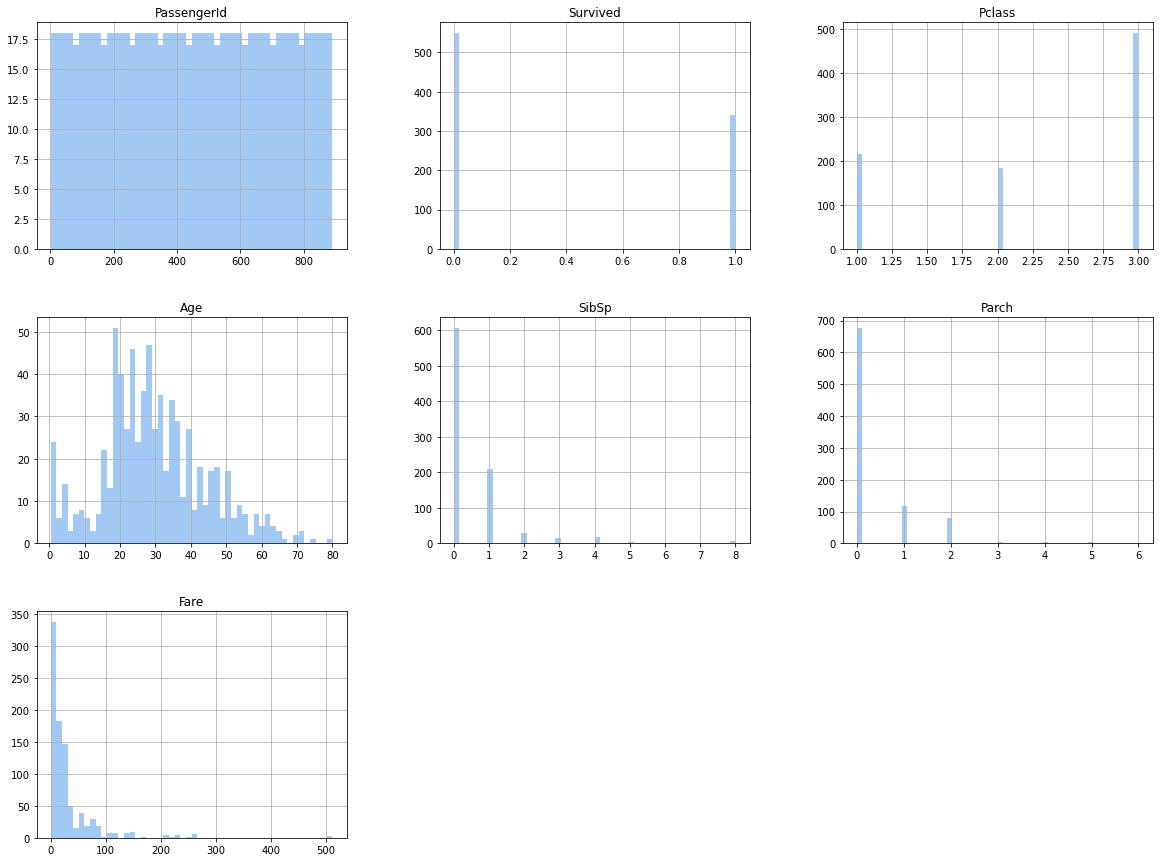

In [7]:
# Visualizing the data
df_train.hist(bins=50, figsize=(20,15), color ="#a1c9f4") # Creating a histogram using data weight
plt.show() # Showing the histogram

- From the graph above, most of the people did not survived. 
- We have 8 different values of siblings and 6 for Parch.
- We have to investigate more about Fare attribute. Most of the people belonged to the third class, paying a low fare. 


We are already able to answer to few previous questions.
1. It's a supervised model - data is labeled.
2. Our goal is two find if the passengers survived or not. That's clearly a binary classification - results must be
   0 or 1.
3. We are going to use Confusion Matrix as a performance measure.

# DATA EXPLORATION AND PATTERNS IDENTIFICATION

In [8]:
# Creating a function to divide the passengers by category and analyze their survival rate
def table(df,category,value):
    """creating a table that shows survival rate related to the category and values chosen"""
    people = df[df[category]== value] # separating data set 
    n_people_Survived = len(people[people["Survived"]==1])
    n_people_NotSurvived = len(people[people["Survived"]==0])
    return pd.DataFrame({"Groups":category + " " + str(value).title(),
                         "Total":len(people),
                          "Survived":n_people_Survived,
                           "Not Survived": n_people_NotSurvived,
                         "% Survived": n_people_Survived/len(people)}, index = [0])

In [9]:
# Let's explore the Pclass category
table_Pclass = pd.concat([table(df_train,"Pclass",1),table(df_train,"Pclass",2),table(df_train,"Pclass",3)])
table_Pclass

,Groups,Total,Survived,Not Survived,% Survived
0,Pclass 1,216,136,80,0.629630
0,Pclass 2,184,87,97,0.472826
0,Pclass 3,491,119,372,0.242363


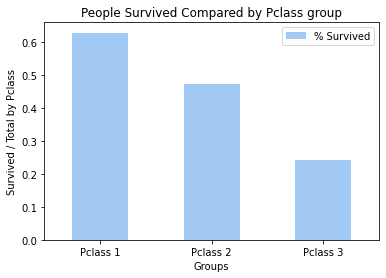

In [10]:
# Plotting table_Pclass table
ax = table_Pclass.plot.bar(x="Groups", y="% Survived", rot=0, color=("#a1c9f4"))
plt.ylabel("Survived / Total by Pclass")
plt.legend(["% Survived"])
plt.title("People Survived Compared by Pclass group")
plt.show()

In [11]:
# We noticed that Names include titles. They can give us important information.
# Extracting titles from Name attribute
df_train["Title"] = df_train.Name.str.extract("([A-Za-z]+)\.", expand=False)
df_test["Title"] = df_test.Name.str.extract("([A-Za-z]+)\.", expand=False)

In [ ]:
# Extra:
# If you don't know regular expressions you can work around it using split function
def extract_title(df,category,value):
    """a function that extracts a title from a name"""
    surname, title_name ,*rest= df[category][value].split(",")
    title_ , name ,*rest= title_name.split(".")
    return title_.title().strip()

# Creating an attribute called Title and extracting all of the titles from names
df_train["Title"] = ""
for x in range(0,len(df_train)):
    df_train["Title"][x] = extract_title(df_train,"Name",x)

In [12]:
# Looking at the Title frequency
df_train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Mme           1
Countess      1
Capt          1
Sir           1
Don           1
Ms            1
Jonkheer      1
Lady          1
Name: Title, dtype: int64

In [13]:
# Creating a table grouping titles and comparing their survival rate
table_title = pd.concat([table(df_train,"Title","Mr"),table(df_train,"Title","Miss"),
                         table(df_train,"Title","Mrs"),table(df_train,"Title","Master")
                       ,table(df_train,"Title","Dr"),table(df_train,"Title","Rev")])
table_title

,Groups,Total,Survived,Not Survived,% Survived
0,Title Mr,517,81,436,0.156673
0,Title Miss,182,127,55,0.697802
0,Title Mrs,125,99,26,0.792000
0,Title Master,40,23,17,0.575000
0,Title Dr,7,3,4,0.428571
0,Title Rev,6,0,6,0.000000


In [14]:
# In order to have the same numbers of categories in the train and test set,
# it's better to incorporate all titles in 5 similar categories
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for df in data:
    # Replacing titles
    df["Title"] = df["Title"].replace(["Lady", "Countess","Capt", "Col","Don", "Dr",\
                                            "Major", "Rev", "Sir", "Jonkheer", "Dona"], "Rare")
    df["Title"] = df["Title"].replace("Mlle", "Miss")
    df["Title"] = df["Title"].replace("Ms", "Miss")
    df["Title"] = df["Title"].replace("Mme", "Mrs")
    # Converting titles into numbers
    df["Title"] = df["Title"].map(titles)
    # Filling NaN with 0, to get safe
    df["Title"] = df["Title"].fillna(0)

We gain a good insight from titles. Women have the highest survival rate. 
Let's move on to dividing Sex attribute between female and male.

In [15]:
# Creating a gender table analysis
table_gender = pd.concat([table(df_train,"Sex","male"),table(df_train,"Sex","female")])
table_gender

,Groups,Total,Survived,Not Survived,% Survived
0,Sex Male,577,109,468,0.188908
0,Sex Female,314,233,81,0.742038


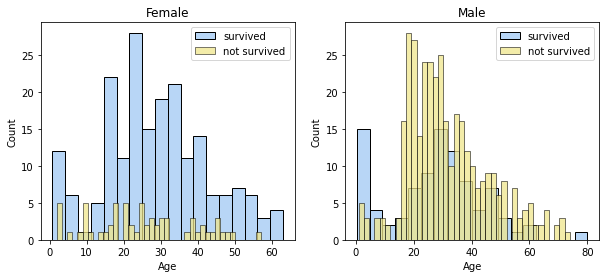

In [16]:
# Plotting table_gender by their Age.
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

women = df_train[df_train["Sex"]=="female"]
men = df_train[df_train["Sex"]=="male"]

ax = sns.histplot(women[women["Survived"]==1].Age.dropna(), bins=18, label = "survived", ax = axes[0],
                  color="#a1c9f4",kde =False)
ax = sns.histplot(women[women["Survived"]==0].Age.dropna(), bins=40, label = "not survived", ax = axes[0],
                  color="khaki", kde =False)
ax.legend()
ax.set_title("Female")

ax = sns.histplot(men[men["Survived"]==1].Age.dropna(), bins=18, label = "survived", ax = axes[1], 
                  color="#a1c9f4", kde = False)
ax = sns.histplot(men[men["Survived"]==0].Age.dropna(), bins=40, label = "not survived", ax = axes[1], 
                  color="khaki",kde = False)
ax.legend()
_ = ax.set_title("Male")


Evidences:
- Females are more likely to survive
- Children are more likely to survive
- We should divide age in categories in order to outilne that children were more likely to survive

In [17]:
# Let's move on Sibs and Parch analysis
table_parch = pd.concat([table(df_train,"Parch",0),table(df_train,"Parch",1),table(df_train,"Parch",2),
              table(df_train,"Parch",3),table(df_train,"Parch",4),table(df_train,"Parch",5),
                         table(df_train,"Parch",6)])

table_parch

,Groups,Total,Survived,Not Survived,% Survived
0,Parch 0,678,233,445,0.343658
0,Parch 1,118,65,53,0.550847
0,Parch 2,80,40,40,0.500000
0,Parch 3,5,3,2,0.600000
0,Parch 4,4,0,4,0.000000
0,Parch 5,5,1,4,0.200000
0,Parch 6,1,0,1,0.000000


In [18]:
table_SibSp = pd.concat([table(df_train,"SibSp",0),table(df_train,"SibSp",1),table(df_train,"SibSp",2),
                         table(df_train,"SibSp",3), table(df_train,"SibSp",4),table(df_train,"SibSp",5),
                         table(df_train,"SibSp",8)])
table_SibSp

,Groups,Total,Survived,Not Survived,% Survived
0,SibSp 0,608,210,398,0.345395
0,SibSp 1,209,112,97,0.535885
0,SibSp 2,28,13,15,0.464286
0,SibSp 3,16,4,12,0.250000
0,SibSp 4,18,3,15,0.166667
0,SibSp 5,5,0,5,0.000000
0,SibSp 8,7,0,7,0.000000


<AxesSubplot:title={'center':'Parch'}, xlabel='Parch'>

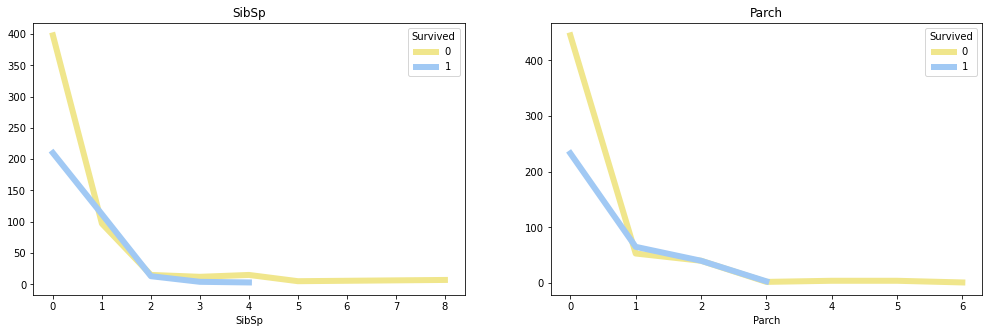

In [19]:
# Let's visualize the findings
colors = ["khaki","#a1c9f4"]
fig, axes = plt.subplots(ncols=2,figsize=(17, 5))
df_train.pivot_table("PassengerId", ["SibSp"], "Survived", "count").plot(ax=axes[0], title="SibSp", 
                                                                         color = colors,linewidth=6)
df_train.pivot_table("PassengerId", ["Parch"], "Survived", "count").plot(ax=axes[1], title="Parch", 
                                                                         color = colors,linewidth=6)

- People alone and people with less than 2 family members have the highest survival rate.
- This data is not telling us that much. It seems that there is a modest relationship between family members and people who have survived.
- We should consider creating a new attribute called Family that includes both Sibs and Parch.
- We should consider creating a new attribute called Alone - People Alone have highest survival rate.
- The attribute Alone will be structured as follows: people without family members get values = 0
  and people with family members get value 1

Tip:
- Be consistent with colors when you are visualizing your data. For ex. I'm always using blue for passengers who have survived, and yellow for passengers who have not survived.

 Let's move on with the cabin analysis
- We don't have a lot of information about the cabin attribute
- We can give value 0 to the people that don't have the cabin
- We can give value 1 to the people that have the cabin

In [20]:
# Visualizing cabin values
df_train["Cabin"].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
D              3
E101           3
              ..
C32            1
C47            1
C110           1
B101           1
F38            1
Name: Cabin, Length: 147, dtype: int64

In [21]:
# Most of Cabin values are missing. Let's give value 1 to the people that have a cabin, and 0 to people
# who don't have it.
for x in data:
    x["Cabin"] = pd.Series([1 if not pd.isnull(i) else 0 for i in x["Cabin"]])

In [22]:
table_cabin = pd.concat([table(df_train,"Cabin",0),table(df_train,"Cabin",1)])
table_cabin

,Groups,Total,Survived,Not Survived,% Survived
0,Cabin 0,687,206,481,0.299854
0,Cabin 1,204,136,68,0.666667


- That was a good call. People who have a cabin have a higher survival rate -People who have a cabin have a higher 
survival rate. When cabin = 0, it means that they have no cabin, cabin = 1 means they have a cabin. 

In [23]:
# Let's explore the last attribute - Embarked
table_Embarked = pd.concat([table(df_train,"Embarked","Q"),table(df_train,"Embarked","S"),
                            table(df_train,"Embarked","C")])
table_Embarked

,Groups,Total,Survived,Not Survived,% Survived
0,Embarked Q,77,30,47,0.389610
0,Embarked S,644,217,427,0.336957
0,Embarked C,168,93,75,0.553571


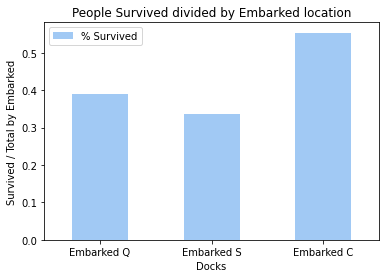

In [24]:
# Plotting table_Embarked
ax = table_Embarked.plot.bar(x="Groups", y="% Survived", rot=0, color="#a1c9f4")
plt.xlabel("Docks")
plt.ylabel("Survived / Total by Embarked")
plt.legend(["% Survived"])
plt.title("People Survived divided by Embarked location")
plt.show()

 - We can hypothesize that people in first and second class embarked from C dock and the other class from
  S and Q docks.

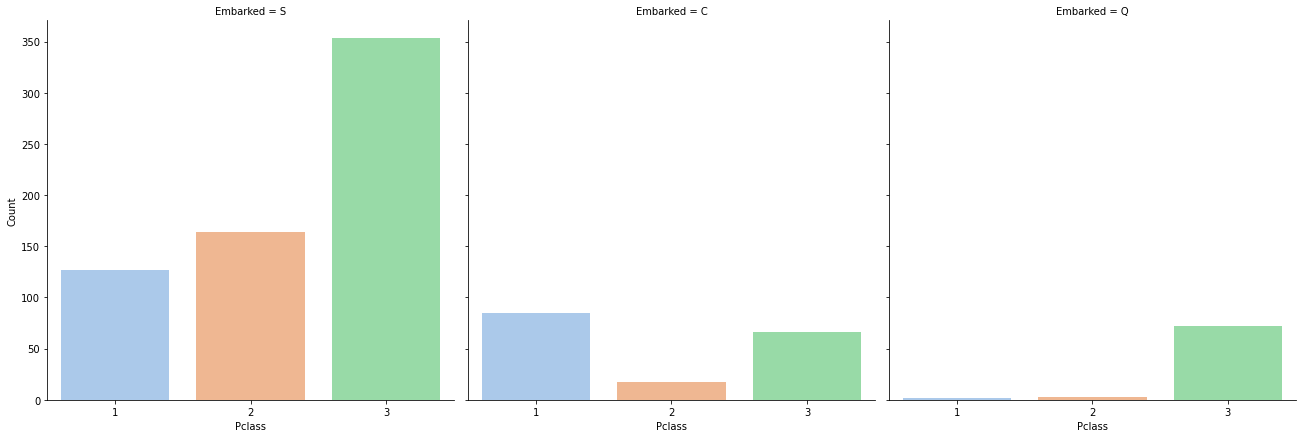

In [25]:
Embarked_chart = sns.catplot(x="Pclass", col="Embarked",  data=df_train,
                   height=6, kind="count", palette="pastel")
Embarked_chart.set_ylabels("Count")

- From dock Q, most of the people belong to third class. Embarked C has the highest survival rate.
- The data doesn't help us gain any further insights.

- Hold on. We have to explore if women with children have a higher survival rate and
  if women in the first two classes have a higher survival rate.


In [26]:
# Let's create a new function that allow us to compare multiple attributes
def table2(df,category1,value1,category2,value2):
    """a function that creates a table that shows survival percentages related to categories and 
    values chosen"""
    people_cat1 = df[df[category1]== value1] # Separating data set
    people = people_cat1[people_cat1[category2]== value2]
    n_people_Survived = len(people[people["Survived"]==1])
    n_people_NotSurvived = len(people[people["Survived"]==0])
    return pd.DataFrame({"Groups":category1 + " " + str(value1).title() +" "+ category2 +" "+ str(value2).title(),
                         "Total":len(people),
                         "Survived":n_people_Survived,
                         "Not survived": n_people_NotSurvived,
                         "% survived": n_people_Survived/len(people)}, index = [0])



In [27]:
# Let's move on to analyzing the connection between Pclass, gender and survival rate
table_gender_Pclass = pd.concat([table2(df_train,"Sex","female","Pclass",1),
                    table2(df_train,"Sex","female","Pclass",2),table2(df_train,"Sex","female","Pclass",3),
                    table2(df_train,"Sex","male","Pclass",1),table2(df_train,"Sex","male","Pclass",2),
                    table2(df_train,"Sex","male","Pclass",3)])
table_gender_Pclass

,Groups,Total,Survived,Not survived,% survived
0,Sex Female Pclass 1,94,91,3,0.968085
0,Sex Female Pclass 2,76,70,6,0.921053
0,Sex Female Pclass 3,144,72,72,0.500000
0,Sex Male Pclass 1,122,45,77,0.368852
0,Sex Male Pclass 2,108,17,91,0.157407
0,Sex Male Pclass 3,347,47,300,0.135447


- That's really intresting - Women in the first and second class have a higher survival rate

- Let's take a look at whether women with children have a high survival rate

In [28]:
gender_kids = pd.concat([table2(df_train,"Sex","female","Parch",0),table2(df_train,"Sex","female","Parch",1),
                         table2(df_train,"Sex","female","Parch",2),table2(df_train,"Sex","male","Parch",0),
                        table2(df_train,"Sex","male","Parch",1),table2(df_train,"Sex","male","Parch",2)])
gender_kids

,Groups,Total,Survived,Not survived,% survived
0,Sex Female Parch 0,194,153,41,0.788660
0,Sex Female Parch 1,60,46,14,0.766667
0,Sex Female Parch 2,49,30,19,0.612245
0,Sex Male Parch 0,484,80,404,0.165289
0,Sex Male Parch 1,58,19,39,0.327586
0,Sex Male Parch 2,31,10,21,0.322581


- It seems that single women, or with one chid, have a higher survival rate.

# MISSING VALUES

We have different options to fill missing values.
We could create a few functions and see different options. You can choose what you think is the best for you.

In [29]:
# Creating a function to show the missing data
def missing_data(df):
    """a function that returns to the percentage of missing data"""
    total = df.isnull().sum().sort_values(ascending=False)
    percent_1 = df.isnull().sum()/df.isnull().count()*100
    percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
    df_missing_data = pd.concat([total, percent_2], axis=1, keys=["Total", "%"])
    return df_missing_data

In [30]:
missing_data(df_train)

,Total,%
Age,177,19.9
Embarked,2,0.2
Title,0,0.0
Cabin,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0


In [31]:
# Creating a function to compute and store the mean and the standar deviation of the not null values
def mean_std(df,category):
    """defining a function that stores the mean and the standard deviation of the dataset"""
    mean = df[category].mean()
    std = df[category].std()
    return mean , std

In [32]:
# Storing the mean and standard deviation
mean_std = mean_std(df_train,"Age")

In [33]:
def fill_null_values(df,category,mean_std):
    """function that fill null values creating an array that contains random numbers, 
    which are computed based on the mean age value, standard deviation and null values."""
    mean = mean_std[0]
    std = mean_std[1]
    is_null = df[category].isnull().sum()
    # Compute random numbers between the mean, std and is_null
    # np.random.seed(42)   ------- To get always the same results
    rand_cat = np.random.randint(mean - std, mean + std, size = is_null)
    # Fill NaN values in category column with random values generated
    df_slice = df[category].copy()
    df_slice[np.isnan(df_slice)] = rand_cat     # If it's not working, try: df_slice[df_slice.isnull()] = rand_cat
    df[category] = df_slice
    df[category] = df[category].astype(int)
    

In [34]:
# Filling null values
fill_null_values(df_train,"Age",mean_std)
fill_null_values(df_test,"Age",mean_std)

In [35]:
# Function to fill categorical null values
def fill_str_randomly(df,category):
    """function that fills null values, creating an array that contains all of the values in the data set, 
    and extract them randomly one by one"""
    category_list = [x for x in df[category].dropna()] # dropna is used to drop null values
    rand_cat = np.random.choice(category_list)
    # fill NaN values in category column with random values generated based on their probability
    df_slice = df[category].copy()
    df_slice[df_slice.isnull()] = rand_cat
    df[category] = df_slice
    df[category] = df[category].astype(str)

In [36]:
# Function to fill numbers null values
def fill_int_randomly(df,category):
    """function that fills null values, creating an array that contains all of the values in the data set, 
    and extract them randomly one by one"""
    category_list = [x for x in df[category].dropna()] # dropna is used to drop null values
    rand_cat = np.random.choice(category_list)
    # fill NaN values in category column with random values generated based on their probability
    df_slice = df[category].copy()
    df_slice[df_slice.isnull()] = rand_cat
    df[category] = df_slice
    df[category] = df[category].astype(int)

In [37]:
for x in data:
     fill_str_randomly(x,"Embarked")
for x in data:
     fill_int_randomly(x,"Fare")

# EXPERIMENTS WITH ATTRIBUTE COMBINATION

In [38]:
# Let's create a data backup - If we make mistakes, we don't need to run all of the code from the beginning
df_train_backup = df_train.copy()
df_test_backup = df_test.copy()

In [39]:
# Category combination function
def cat_comb(df,cat1,value1,cat2,value2):
    """function that returns to a new category with boolean values - 1 if the assumption has been satisfied, 
    0 if not"""
    assumption = (df[cat1] == value1) & (df[cat2] == value2)
    return np.where(assumption,1,0)

In [40]:
# Create a new attribute Sex_Pclass
for df in data:
    df["Female_Pclass1"] = cat_comb(df,"Sex","female","Pclass",1)
    df["Female_Pclass2"] = cat_comb(df,"Sex","female","Pclass",2)
    df["Female_Pclass3"] = cat_comb(df,"Sex","female","Pclass",3)
    df["male_Pclass1"] = cat_comb(df,"Sex","male","Pclass",1)
    df["male_Pclass2"] = cat_comb(df,"Sex","male","Pclass",2)
    df["male_Pclass3"] = cat_comb(df,"Sex","male","Pclass",3)

In [41]:
# Creating Family attribute
for df in data:
    df["Family"] = df["Parch"] + df["SibSp"]

In [42]:
# Creating Alone attribute - Where Alone = 0 means passenger is not alone, Alone = 1 means passenger is alone
for df in data:
    df.loc[df["Family"] > 0, "Alone"] = 0
    df.loc[df["Family"] == 0, "Alone"] = 1
    df["Alone"] = df["Alone"].astype(int)

In [43]:
# Grouping Age in 7 different categories
for df in data:
    df["Age"] = df["Age"].astype(int)
    df.loc[ df["Age"] <= 11, "Age"] = 0
    df.loc[(df["Age"] > 11) & (df["Age"] <= 18), "Age"] = 1
    df.loc[(df["Age"] > 18) & (df["Age"] <= 22), "Age"] = 2
    df.loc[(df["Age"] > 22) & (df["Age"] <= 27), "Age"] = 3
    df.loc[(df["Age"] > 27) & (df["Age"] <= 32), "Age"] = 4
    df.loc[(df["Age"] > 32) & (df["Age"] <= 40), "Age"] = 5
    df.loc[(df["Age"] > 40) & (df["Age"] <= 50), "Age"] = 6
    df.loc[ df["Age"] > 50, "Age"] = 7


In [44]:
# Checking if Age category values are well distributed
df_train["Age"].value_counts()

5    169
4    145
3    134
2    126
6    100
1     85
0     68
7     64
Name: Age, dtype: int64

In [45]:
# Creating a new attribute called Fare_per_person
for df in data:
    df["Fare_Per_Person"] = df["Fare"]/(df["Family"]+1)
    df["Fare_Per_Person"] = df["Fare_Per_Person"].astype(int)

In [46]:
# Grouping Fare_per_person in 5 different categories based on Fare prices.
for df in data:
    df.loc[ df["Fare_Per_Person"] <= 7.91, "Fare_Per_Person"] = 0
    df.loc[(df["Fare_Per_Person"] > 7.91) & (df["Fare_Per_Person"] <= 14.454), "Fare_Per_Person"] = 1
    df.loc[(df["Fare_Per_Person"] > 14.454) & (df["Fare_Per_Person"] <= 31), "Fare_Per_Person"]   = 2
    df.loc[(df["Fare_Per_Person"] > 31) & (df["Fare_Per_Person"] <= 99), "Fare_Per_Person"]   = 3
    df.loc[ df["Fare_Per_Person"] > 99, "Fare_Per_Person"] = 4
    df["Fare_Per_Person"] = df["Fare_Per_Person"].astype(int)

In [47]:
df_train["Fare_Per_Person"].value_counts()

0    387
1    255
2    127
3    100
4     22
Name: Fare_Per_Person, dtype: int64

# DATA CLEANING

In [48]:
# Storing PassengerId df_test because it's needed to upload the results online
column_passengers = df_test["PassengerId"] 

df_train = df_train.drop(["Name"], axis=1)
df_train = df_train.drop(["PassengerId"], axis=1)
df_train = df_train.drop(["Ticket"], axis=1)  # Ticket attribute has 681 unique tickets, 
                                              # it was useless to convert its values into a useful category.
df_train = df_train.drop(["Fare"], axis=1)


df_test = df_test.drop(["Name"], axis=1)
df_test = df_test.drop(["PassengerId"], axis=1)
df_test = df_test.drop(["Ticket"], axis=1)
df_test = df_test.drop(["Fare"], axis=1)


# CONVERTING FEATURES

As we discussed, ML models require all input and output variables to be numeric. This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model.

One issue with this representation is that ML algorithms will assume that two nearby values are more similar 
than two distant values. To fix this issue, a common solution is to create one binary attribute per category.
The new attributes are called dummies attributes. Scikit-Learn provides a OneHotEncoder class to convert 
categorical values into one-hot vectors. Here we are going that returns to dummies attributies. 

In [49]:
def dummies(df):
    """a function that returns to dummies attributes"""
    encode_col_list = list(df.select_dtypes(include=["object"]).columns)
    for i in encode_col_list:
        df = pd.concat([df,pd.get_dummies(df[i], prefix=i)],axis=1)
        df.drop(i, axis = 1, inplace=True)
    return df

In [50]:
df_train = dummies(df_train)
df_test = dummies(df_test)

In [51]:
# Showing how the data has been transformed
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Cabin,Title,Female_Pclass1,Female_Pclass2,Female_Pclass3,...,male_Pclass2,male_Pclass3,Family,Alone,Fare_Per_Person,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,2,1,0,0,1,0,0,0,...,0,1,1,0,0,0,1,0,0,1
1,1,1,5,1,0,1,3,1,0,0,...,0,0,1,0,3,1,0,1,0,0
2,1,3,3,0,0,0,2,0,0,1,...,0,0,0,1,0,1,0,0,0,1
3,1,1,5,1,0,1,3,1,0,0,...,0,0,1,0,2,1,0,0,0,1
4,0,3,5,0,0,0,1,0,0,0,...,0,1,0,1,1,0,1,0,0,1


# SELECTING THE MODELS

- There is no Survived label on the testing set - we have to use the predictions in the train 
  set to compare the algorithms with each other 

In [52]:
# Preparing the data
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]

X_test  = df_test

- We are going to choose 4 different algorithms:
    1. K Nearest Neighbor
    2. Random Forest
    3. Logistic Regression
    4. Decision Tree

In [53]:
# K Nearest Neighbor:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
accuracy_knn = round(knn.score(X_train, Y_train) * 100, 2)
accuracy_knn

87.09

In [54]:
# Random Forest:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
accuracy_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
accuracy_random_forest

92.37

In [55]:
# Logistic Regression:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

accuracy_log = round(logreg.score(X_train, Y_train) * 100, 2)
accuracy_log

82.49

In [56]:
# Decision Tree:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
accuracy_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
accuracy_decision_tree

92.37

In [57]:
# Best model table
results = pd.DataFrame({
    "Score": [ accuracy_knn, accuracy_log, 
              accuracy_random_forest,  
               accuracy_decision_tree],
    "Model": [ "KNN", "Logistic Regression", 
              "Random Forest",
              "Decision Tree"]})
result_table = results.sort_values(by="Score", ascending=False)
result_table  = result_table.set_index("Score")
result_table 

,Model
Score,
92.37,Random Forest
92.37,Decision Tree
87.09,KNN
82.49,Logistic Regression


- Random Forest classifier and decision tree go in the first place. Is this the real score?

In [58]:
# Let's start with a cross validation that gives us an idea of the model accuracy
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.78888889 0.80898876 0.73033708 0.80898876 0.84269663 0.80898876
 0.85393258 0.7752809  0.86516854 0.85393258]
Mean: 0.8137203495630463
Standard Deviation: 0.03979285744097151


- Our model has an accuracy of 81% with a standard deviation of 4%. The standard deviation means that
  our model can differ in average about + — 4%.
  I prefer to say that our model accuracy is between 73% to 86%.
  It looks like the model is overfitting the data.
  We should reduce the size of the random forest model by removing the less important features (pruning the model).

In [59]:
# Let take a look which are the most important features
importances = pd.DataFrame({"feature":X_train.columns,"importance":np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values("importance",ascending=False).set_index("importance")
importances.head(20)

,feature
importance,
0.182,Age
0.123,Title
0.092,Sex_female
0.088,Sex_male
0.084,Fare_Per_Person
0.062,Family
0.055,Female_Pclass1
0.042,Pclass
0.041,male_Pclass3


In [60]:
# Creating a final model by deleting all of the unnecessary features in order to prune our selected model and 
# increase its performance
X_train_final = X_train.copy()   # Creating a copy of train data
X_test_final  = X_test.copy() # Creating a copy of test data
final_data = [X_train_final,X_test_final]

for df in final_data:
    df = df.drop("male_Pclass2", axis=1)
    df = df.drop("Embarked_Q", axis=1)
    df = df.drop("male_Pclass1", axis=1)
    df = df.drop("Alone", axis=1)
    df = df.drop("Embarked_C", axis=1)
    df = df.drop("Embarked_S", axis=1)


In [61]:
# Checking the new model accuracy
rf = RandomForestClassifier(n_estimators=1000,bootstrap =True)
random_forest.fit(X_train_final, Y_train)

Y_prediction = random_forest.predict(X_test_final)

random_forest.score(X_train_final, Y_train)
accuracy_random_forest = round(random_forest.score(X_train_final, Y_train) * 100, 2)
accuracy_random_forest

92.37

In [62]:
# Let's check again the scores with a cross validation
scores = cross_val_score(rf, X_train_final, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77777778 0.82022472 0.73033708 0.79775281 0.85393258 0.83146067
 0.84269663 0.78651685 0.85393258 0.84269663]
Mean: 0.813732833957553
Standard Deviation: 0.038091931490909704


It looks like our final model performs the same than the previous one. We have still margin for
improvment. Let's take a look of the performance of our model using confusion matrix.

The confusion matrix measures the perfomances of the model.
A confusion matrix is nothing but a table with two dimensions viz. “Actual” and “Predicted” 
and furthermore, both the dimensions have “True Positives (TP)”, “True Negatives (TN)”, “False Positives (FP)”, 
“False Negatives (FN)”.

In [63]:
predictions = cross_val_predict(rf, X_train_final, Y_train, cv=10)
confusion_matrix(Y_train, predictions)

array([[471,  78],
       [ 85, 257]])

F1 score is the weighted average of the precision and recall. The best value of F1 would be 1 and worst would be 0.
We can calculate F1 score with the help of following formula:
𝑭𝟏 = 𝟐 * (𝒑𝒓𝒆𝒄𝒊𝒔𝒊𝒐𝒏 ∗ 𝒓𝒆𝒄𝒂𝒍𝒍) / (𝒑𝒓𝒆𝒄𝒊𝒔𝒊𝒐𝒏 + 𝒓𝒆𝒄𝒂𝒍𝒍)

In [64]:
# F1 score:
f1_score(Y_train, predictions)

0.7592319054652881

The F1 score favors classifiers that have similar precision and recall. This is not always what you want: 
in some contexts you mostly care about precision, and in other contexts you really care about recall. 
We know that most of the people died, and we need to detect how many people survived on the Titanic.
It make sense for us to train our classifier with a higher precision. Thus, we should prefer
the precision/recall curve over the ROC curve.

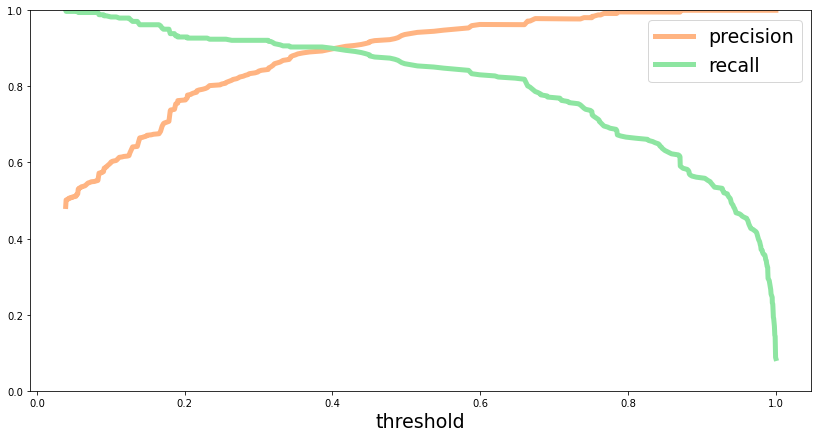

In [65]:
# Getting the probabilities of our prediction model
y_scores = random_forest.predict_proba(X_train_final)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    """function that returns to the precision, recall vs threshold plot"""
    plt.plot(threshold, precision[:-1], color="#ffb482", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], color="#8de5a1", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])
    plt.show()
     

plt.figure(figsize=(14, 7))      
plot_precision_and_recall(precision, recall, threshold)

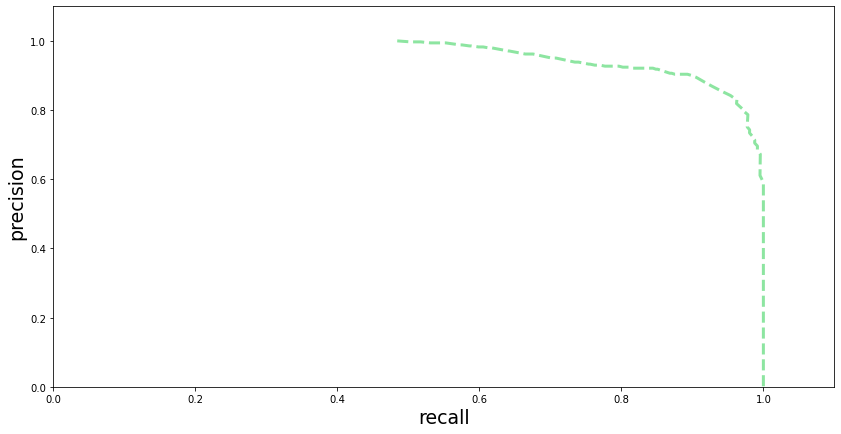

In [66]:
def plot_precision_vs_recall(precision, recall):
    """function that returns to the precision vs recall plot"""
    plt.plot(precision,recall, "g--",color= "#8de5a1", linewidth=3)
    plt.xlabel("recall", fontsize=19)
    plt.ylabel("precision", fontsize=19)
    plt.axis([0, 1.1, 0, 1.1])
    plt.show()

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision,recall)


You can see that precision starts to fall sharply around 80% recall. We want to select a precision/recall tradeoff that gives us a high precision - we need to detect how many people survived on the Titanic knowing that most of the people died. In this case we should care more about false positives than false negatives.

In fact, in our model we are going to search for the lowest threshold that gives us at least 99% precision (np.argmax() and will give us the first index of the maximum value, which in this case means the first True value).

In [69]:
# We are going to compute the threshold based on the precision that we want to achieve
threshold_precision = threshold[np.argmax(precision >= 0.99)] # To get 99% precision
Y_train_pred = (y_scores >= threshold_precision)

# Checking our prediction score based on precision and recall:
precision_score(Y_train, Y_train_pred) 


0.9916666666666667

In [70]:
# Recall score
recall_score(Y_train, Y_train_pred) 

0.695906432748538

- 99% of precision at 70% recall it's quite good for our model!

In [72]:
# Our threshold score
threshold_precision

0.76725

In [ ]:
# Extra:
# If you preferred the ROC curve over the precision/recall, one approach to calculate the ideal threshold 
# for imbalance classification is to find the optimal threshold for ROC Curve.

def threshold(true_positive_rate,false_positive_rate):
    """a function that returns to the best threshold value for ROC Curve"""
    # calculate the g-mean for each threshold
    gmeans = np.sqrt(true_positive_rate * (1-false_positive_rate))
    # locate the index of the largest g-mean
    result = best_threshold =  np.argmax(gmeans) / 100
    return result

best_threshold_ROC = threshold(true_positive_rate,false_positive_rate)

best_threshold_ROC

In [73]:
# Let's move the threshold on our model based on our findings
threshold = threshold_precision

predicted_proba = random_forest.predict_proba(X_test_final)
predicted = (predicted_proba [:,1] >= threshold).astype("int")
score = predicted


In [74]:
# Creating a DataFrame with the passengers Ids and our predictions regarding whether they survived or not
submission = pd.DataFrame({"PassengerId":column_passengers,"Survived": score})


In [75]:
filename = "Titanic_Prediction.csv"

submission.to_csv(filename,index=False)

print("Saved file: " + filename)

Saved file: Titanic_Prediction.csv


With this approach, I scored within the top 11% in the Titanic competition -  scoring 0.79.